<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [29]:
# Import libraries.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset in the csv file from the URL


In [30]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [31]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [32]:
boston_df = pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [33]:
# Sanity check of the dataset.
# transpose() is used to make the data fit on a single line.
print('Dataframe\'s top entries: \n', boston_df.head().transpose())
print('\n\nDataframe\'s last entries: \n', boston_df.tail().transpose())

Dataframe's top entries: 
                     0          1          2          3          4
Unnamed: 0    0.00000    1.00000    2.00000    3.00000    4.00000
CRIM          0.00632    0.02731    0.02729    0.03237    0.06905
ZN           18.00000    0.00000    0.00000    0.00000    0.00000
INDUS         2.31000    7.07000    7.07000    2.18000    2.18000
CHAS          0.00000    0.00000    0.00000    0.00000    0.00000
NOX           0.53800    0.46900    0.46900    0.45800    0.45800
RM            6.57500    6.42100    7.18500    6.99800    7.14700
AGE          65.20000   78.90000   61.10000   45.80000   54.20000
DIS           4.09000    4.96710    4.96710    6.06220    6.06220
RAD           1.00000    2.00000    2.00000    3.00000    3.00000
TAX         296.00000  242.00000  242.00000  222.00000  222.00000
PTRATIO      15.30000   17.80000   17.80000   18.70000   18.70000
LSTAT         4.98000    9.14000    4.03000    2.94000    5.33000
MEDV         24.00000   21.60000   34.70000   33.

In [34]:
# Basics statistical summary of the dataset .
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [35]:
boston_df.info

<bound method DataFrame.info of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       

In [36]:
# Check data types and for missing entries.
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


#### Task 4
**For the "Median value of owner-occupied homes" provide a boxplot**


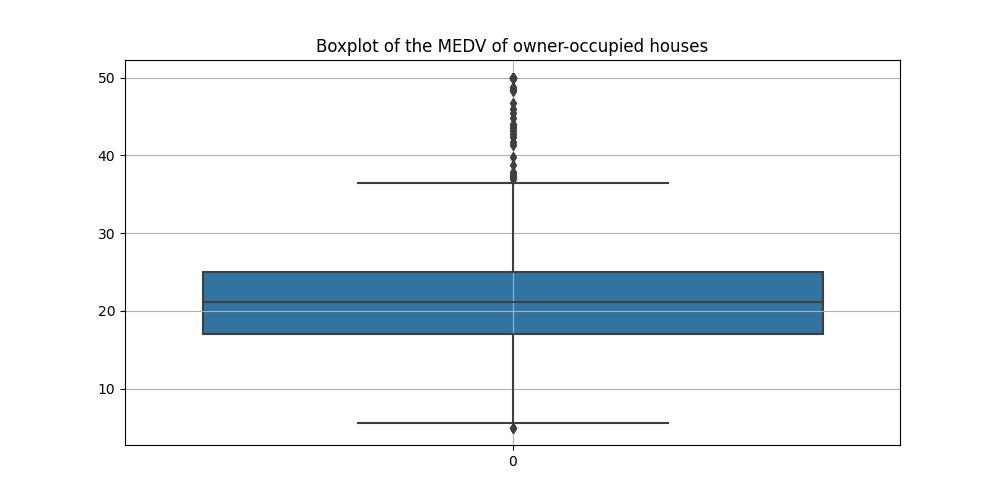

In [37]:
# Boxplot of the Median value of owner-occupied homes.
plt.figure(figsize = (10,5))
sns.boxplot(boston_df['MEDV']) # Select the 'MEDV' attribute/column.
plt.title('Boxplot of the MEDV of owner-occupied houses')
plt.grid()
plt.show()

**Provide a  bar plot for the Charles river variable**


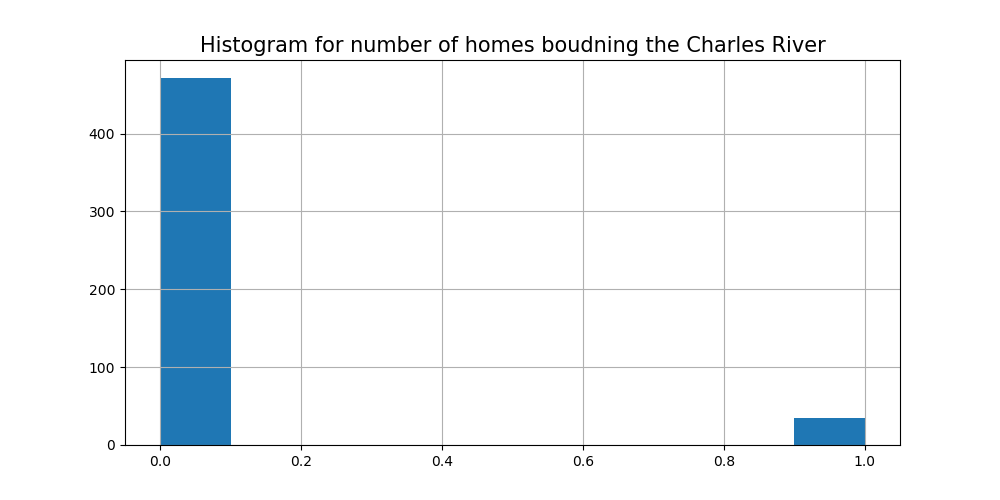

In [38]:
# Histogram for the Charles River variable.
# CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
plt.figure(figsize=(10, 5))
plt.hist(boston_df['CHAS'], bins = 10)
plt.title('Histogram for number of homes boudning the Charles River', fontsize = 15)
plt.grid()
plt.show()

**Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

In [39]:
# Create a copy of the original dataframe before applying filters
boston_df_OG = boston_df # 'OG' is alias of 'original'.

In [40]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.

boston_df.loc[(boston_df['AGE'] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [41]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [42]:
# Remove the first column 'Unnamed'.
boston_df_edited  = boston_df.iloc[:, 1:]
boston_df_edited.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [43]:
boston_df_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  age_group  506 non-null    object 
dtypes: float64(13), object(1)
memory usage: 53.4+ KB


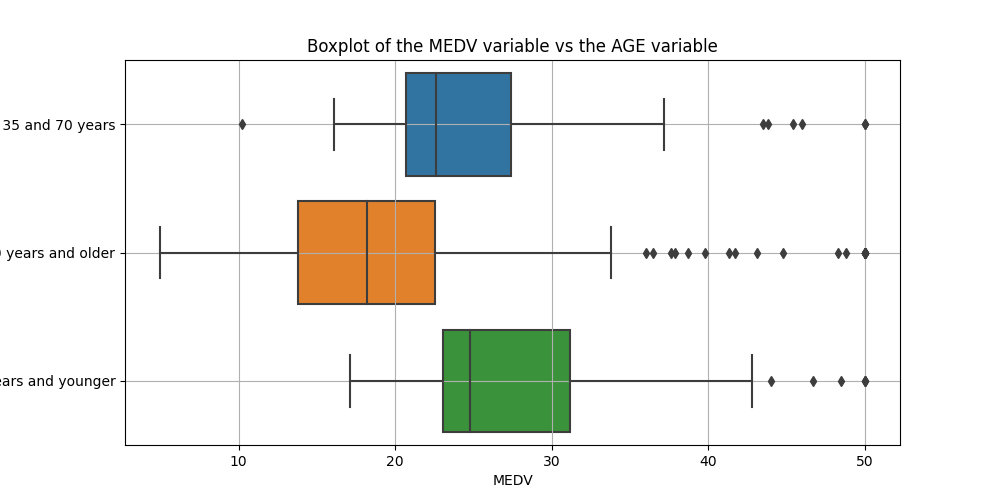

In [44]:
# Create a boxplot.
plt.figure(figsize = (10,5))
sns.boxplot(x = boston_df_edited.MEDV, y = boston_df_edited.age_group, data = boston_df_edited) # Use dot notation to specify the dependent and independent variables.
plt.title('Boxplot of the MEDV variable vs the AGE variable')
plt.grid()
plt.show()

**Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town**

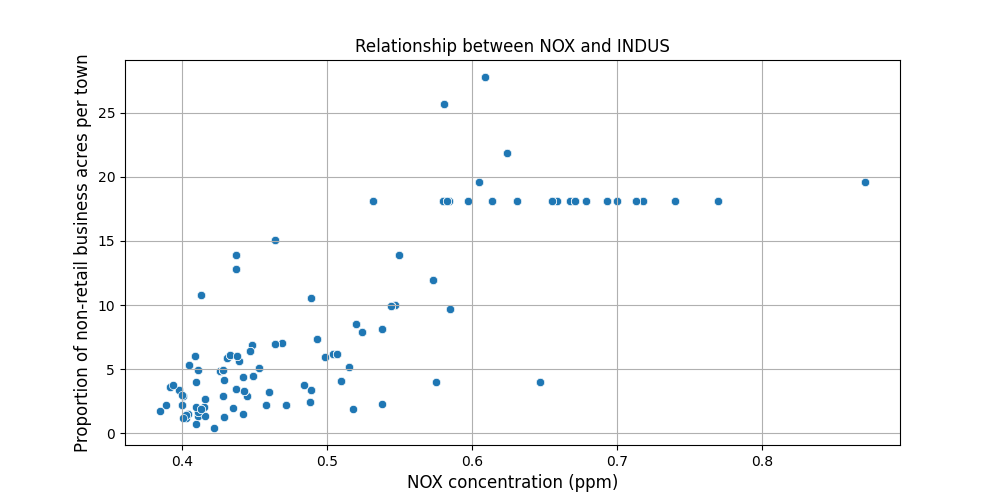

In [45]:
# Provide a scatter plot to show the relationship between NOX concentrations & the proportion of non-retail business acres per town. 
# We revert to the initial dataset to which we had not applied the age filters.
plt.figure(figsize = (10,5))
sns.scatterplot(x = boston_df_OG.NOX, y = boston_df_OG.INDUS, data = boston_df)
plt.title('Relationship between NOX and INDUS', fontsize = 12)
plt.xlabel('NOX concentration (ppm)', fontsize = 12)
plt.ylabel('Proportion of non-retail business acres per town', fontsize = 12)
plt.grid()
plt.show()

**Create a histogram for the pupil to teacher ratio variable**

<ipython-input-46-f4b77d4a7267>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df_OG['PTRATIO'], bins = 10, kde=True, hist=True)


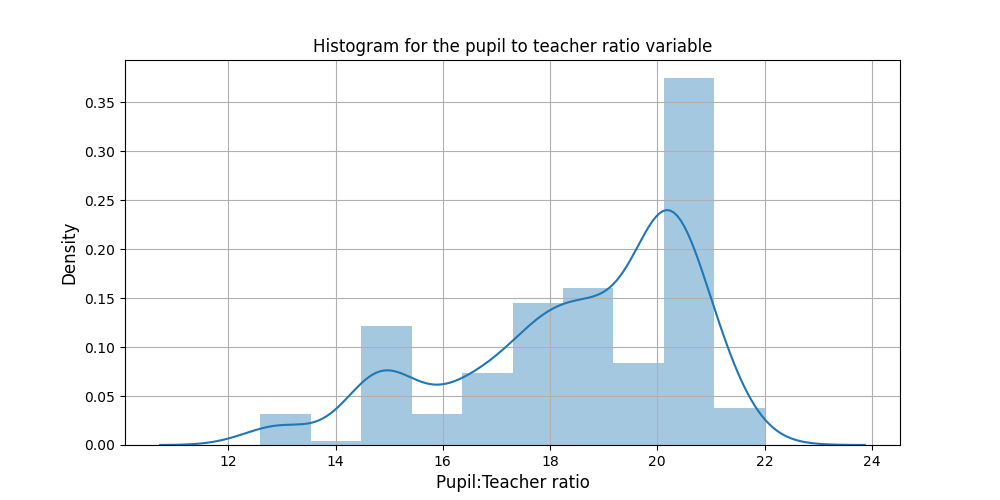

In [46]:
# Histogram of the pupil:teacher ratio.
plt.figure(figsize = (10,5))
sns.distplot(boston_df_OG['PTRATIO'], bins = 10, kde=True, hist=True)
plt.title('Histogram for the pupil to teacher ratio variable', fontsize = 12)
plt.xlabel('Pupil:Teacher ratio', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.grid()
plt.show()

#### Task 5 - Use the appropriate tests to answer the questions provided.

**Question:** Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples):

In [47]:
# Use the edited dataframe.
boston_df_edited.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [48]:
# Compare the 'classes' for bounding the river.
boston_df_edited["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [49]:
# Separate the classes.
positive_class = boston_df_edited[boston_df_edited['CHAS'] == 0]['MEDV']
negative_class = boston_df_edited[boston_df_edited['CHAS'] == 1]['MEDV']

In [50]:
stats.ttest_ind(positive_class, negative_class, axis = 0, equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Analysis:** Since p-value is less than alpha value of 0.05, we reject the null hypothesis since there is statistical significance.

**Question:** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation).

In [51]:
pearson, p_value = stats.pearsonr(boston_df_OG['NOX'], boston_df_OG['INDUS'])
print('Pearson Coefficient value={}, p-value={}'.format(pearson, p_value)) 

Pearson Coefficient value=0.7636514469209189, p-value=7.913361061211254e-98


**Analysis:** Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

**Question:** What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis).

In [52]:
import statsmodels.api as sm
med = boston_df_edited['MEDV']
dis = boston_df_edited['DIS']
x = sm.add_constant(med)

In [53]:
results = sm.OLS(dis, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.21e-08
Time:                        19:40:38   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# The linear correlation coefficient is calculated as follows.
lin_coef = np.sqrt(0.062)  
print(lin_coef)

0.24899799195977465


**Discussion:** The linear correlation coefficient is 0.25 indicating a weak linear relationship between the two variables.